#ARIMA FORECAST

## 1 Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2 Database

In [ ]:
db=pd.read_csv("M2SLMoneyStock.csv")
db

,Date,Money
0,1/1/1995,3492.4
1,2/1/1995,3489.9
2,3/1/1995,3491.1
3,4/1/1995,3499.2
4,5/1/1995,3524.2
...,...,...
247,8/1/2015,12096.8
248,9/1/2015,12153.8
249,10/1/2015,12187.7
250,11/1/2015,12277.4


<Axes: >

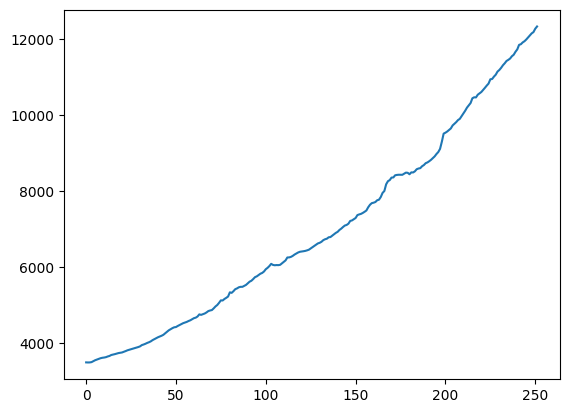

In [ ]:
db["Money"].plot()

## 3 Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_sationarity=adfuller(db["Money"],autolag="AIC")
print("P-Value: ", test_sationarity[1])

P-Value:  1.0


## 3.1 First diff

In [ ]:
db["Diff_Money"]=db["Money"]-db["Money"].shift(1)

In [ ]:
db

,Date,Money,Diff_Money
0,1/1/1995,3492.4,NaN
1,2/1/1995,3489.9,-2.5
2,3/1/1995,3491.1,1.2
3,4/1/1995,3499.2,8.1
4,5/1/1995,3524.2,25.0
...,...,...,...
247,8/1/2015,12096.8,51.5
248,9/1/2015,12153.8,57.0
249,10/1/2015,12187.7,33.9
250,11/1/2015,12277.4,89.7


In [ ]:
test_stationarity_2=adfuller(db["Diff_Money"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  0.26198379785112447


second diff

In [ ]:
db["Diff_Money_2"]=db["Diff_Money"]-db["Diff_Money"].shift(1)

In [ ]:
test_stationarity_2=adfuller(db["Diff_Money_2"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  4.760674931295455e-10


## 4 Partial Aitocorrelation

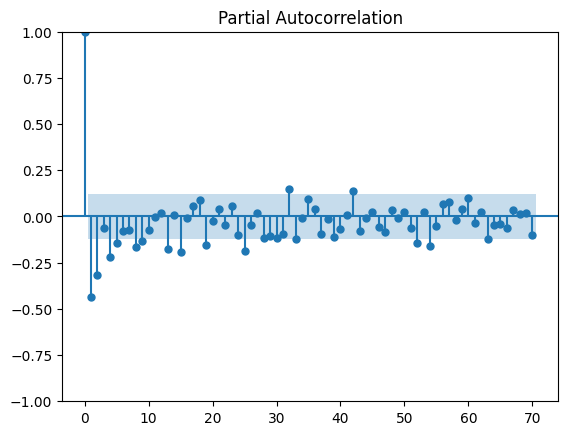

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["Diff_Money_2"].dropna(),lags=70)

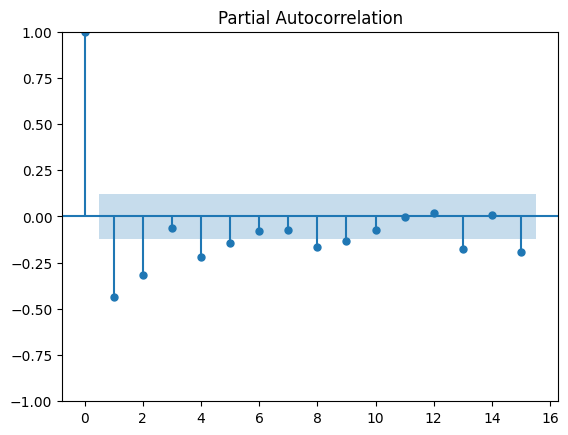

In [ ]:
pacf=plot_pacf(db["Diff_Money_2"].dropna(),lags=15)

## 4.1 Auto acf

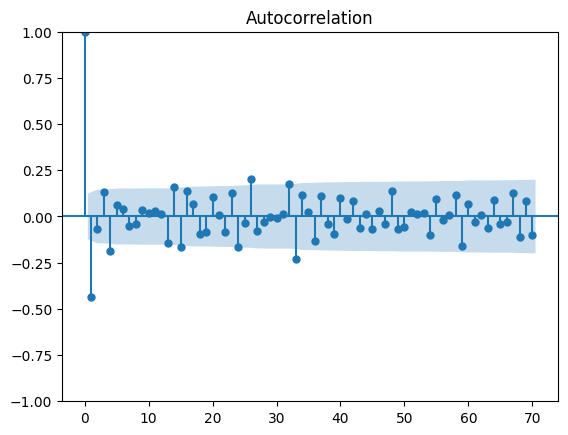

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db["Diff_Money_2"].dropna(), lags=70)

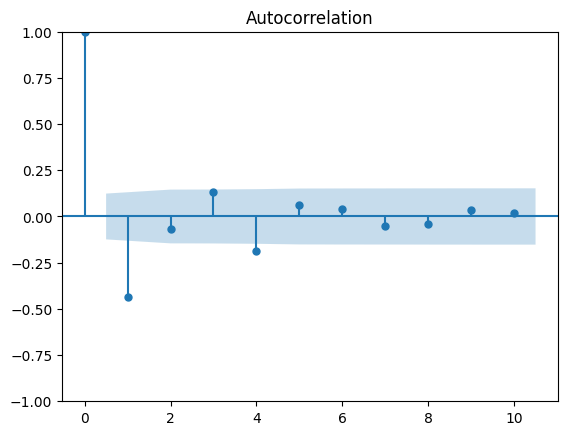

In [ ]:
acf=plot_acf(db["Diff_Money_2"].dropna(), lags=10)

## 5 Autoregressive model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
modelARIMA = ARIMA(db["Diff_Money_2"].dropna(), order=(54,2,33)).fit()
print(modelARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:           Diff_Money_2   No. Observations:                  250
Model:               ARIMA(54, 2, 33)   Log Likelihood               -1115.229
Date:                Mon, 04 Sep 2023   AIC                           2406.458
Time:                        23:45:12   BIC                           2715.640
Sample:                             0   HQIC                          2530.923
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4533      0.943     -1.541      0.123      -3.302       0.395
ar.L2         -1.7072      1.446     -1.181      0.238      -4.541       1.127
ar.L3         -2.2802      1.805     -1.263      0.2

## 6 Predictions

In [ ]:
pred_1=modelARIMA.predict(dynamic=False)
pred_1

2       0.000000
3       5.545606
4      10.086008
5      21.987080
6      10.479675
         ...    
247    -5.708996
248   -14.492203
249   -16.604225
250    38.502906
251   -24.329341
Name: predicted_mean, Length: 250, dtype: float64

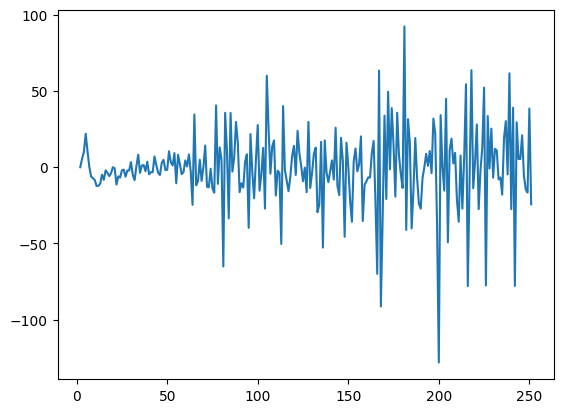

In [ ]:
plt.plot(pred_1)

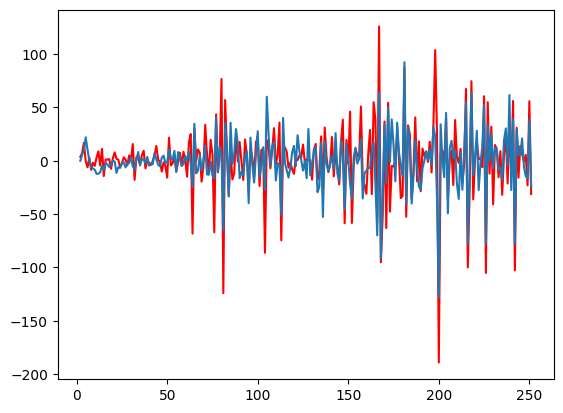

In [ ]:
from matplotlib import pyplot
pyplot.plot(db["Diff_Money_2"].dropna(),color="red")
pyplot.plot(pred_1)

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

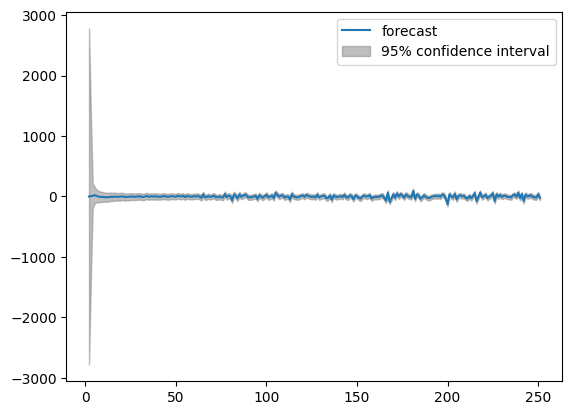

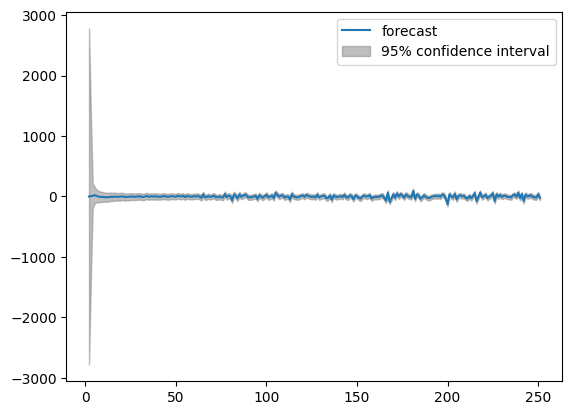

In [ ]:
plot_predict(modelARIMA)

## Forecast

In [ ]:
forecast = modelARIMA.forecast(steps=5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast

250    11.808232
251    -3.254342
252    24.048642
253    27.267586
254   -60.881849
Name: predicted_mean, dtype: float64

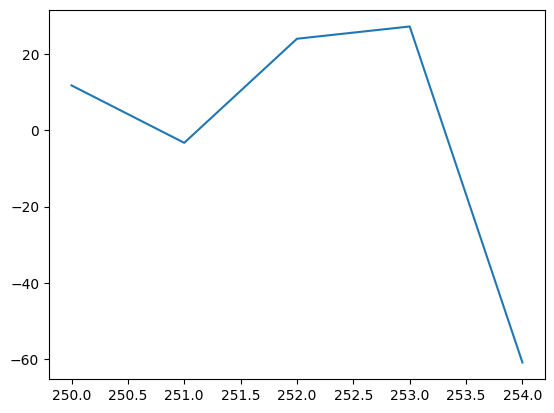

In [ ]:
plt.plot(forecast)